# Big Mart Sales Prediction


## Data Loading and Preprocessing

In [23]:
import pandas as pd
import numpy as np

dataset = pd.read_csv('/kaggle/input/bigmart-sales-data/Train.csv')
dataset.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [24]:
dataset.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

### Data Imputation 
There are missing values for two features. So we fill the null values with mean and mode.

In [25]:
# Data Imputation

dataset['Item_Weight'].fillna(dataset['Item_Weight'].mean(), inplace = True)

# filling the missing values in "Outlet_Size" column with Mode
mode_of_Outlet_size = dataset.pivot_table(values='Outlet_Size', columns='Outlet_Type', aggfunc=(lambda x: x.mode()[0]))
miss_values = dataset['Outlet_Size'].isnull()
dataset.loc[miss_values, 'Outlet_Size'] = dataset.loc[miss_values,'Outlet_Type'].apply(lambda x: mode_of_Outlet_size[x])

dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                8523 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                8523 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


## Data Encoding
All the objects were converted into integer values

In [26]:
from sklearn.preprocessing import LabelEncoder

In [27]:
dataset.replace({'Item_Fat_Content': {'low fat':'Low Fat','LF':'Low Fat', 'reg':'Regular'}}, inplace=True)

In [28]:
encoder = LabelEncoder()

In [29]:
dataset['Item_Identifier'] = encoder.fit_transform(dataset['Item_Identifier'])

dataset['Item_Fat_Content'] = encoder.fit_transform(dataset['Item_Fat_Content'])

dataset['Item_Type'] = encoder.fit_transform(dataset['Item_Type'])

dataset['Outlet_Identifier'] = encoder.fit_transform(dataset['Outlet_Identifier'])

dataset['Outlet_Size'] = encoder.fit_transform(dataset['Outlet_Size'])

dataset['Outlet_Location_Type'] = encoder.fit_transform(dataset['Outlet_Location_Type'])

dataset['Outlet_Type'] = encoder.fit_transform(dataset['Outlet_Type'])

## Removing Outliers

In [30]:
for feature in ['Item_Weight', 'Item_Visibility', 'Item_MRP']:
    min_, max_value = dataset[feature].quantile([0.001, 0.999])
    dataset = dataset[(dataset[feature] >= min_) & (dataset[feature] <= max_value)]

# Reset the index
dataset.reset_index(drop=True, inplace=True)

# View the shape of the filtered dataset
print(dataset.shape)


(8480, 12)


In [31]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8480 entries, 0 to 8479
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8480 non-null   int64  
 1   Item_Weight                8480 non-null   float64
 2   Item_Fat_Content           8480 non-null   int64  
 3   Item_Visibility            8480 non-null   float64
 4   Item_Type                  8480 non-null   int64  
 5   Item_MRP                   8480 non-null   float64
 6   Outlet_Identifier          8480 non-null   int64  
 7   Outlet_Establishment_Year  8480 non-null   int64  
 8   Outlet_Size                8480 non-null   int64  
 9   Outlet_Location_Type       8480 non-null   int64  
 10  Outlet_Type                8480 non-null   int64  
 11  Item_Outlet_Sales          8480 non-null   float64
dtypes: float64(4), int64(8)
memory usage: 795.1 KB


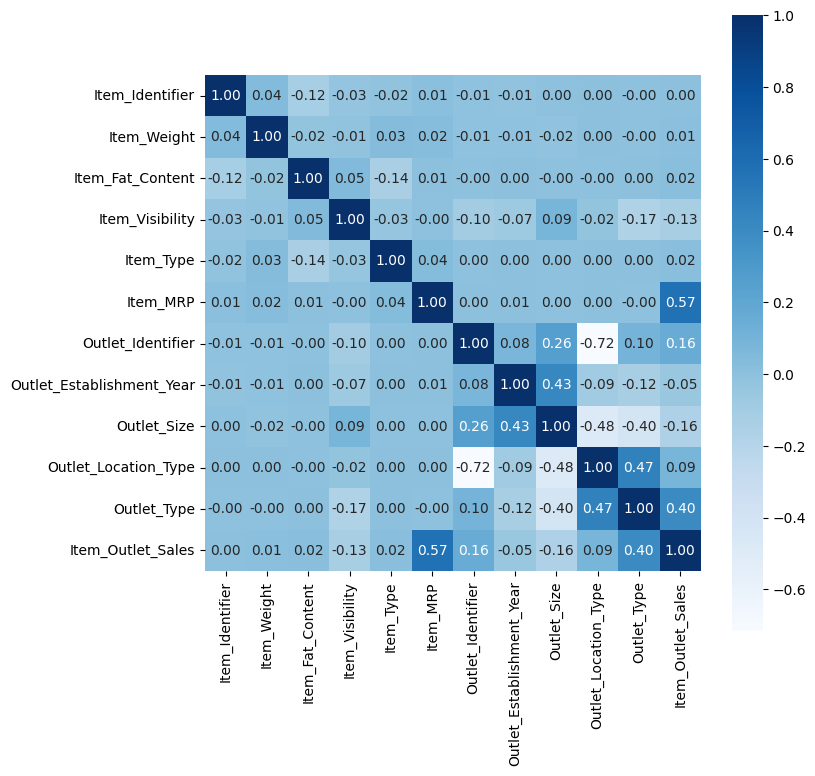

In [32]:
import matplotlib.pyplot as plt
import seaborn as sns

corr = dataset.corr()

plt.figure(figsize = (8,8))
sns.heatmap(corr, cbar = True, cmap = 'Blues', square = True, annot = True, fmt = '.2f')
plt.show()

In [33]:
np.ptp(dataset)

13086.9648

In [34]:
# Standard Scaler and PCA

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

X = dataset.drop('Item_Outlet_Sales', axis = 1)
y = dataset['Item_Outlet_Sales']

scaler = StandardScaler()
X_norm = scaler.fit_transform(X)
pca = PCA(n_components = 6)
X_pca = pca.fit_transform(X_norm)

np.ptp(X_norm)


6.813326132879052

In [35]:
# Train Test Split

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_norm, y, test_size = 0.2, random_state = 42)
print(X_train.shape, X_test.shape)

(6784, 11) (1696, 11)


In [36]:
from sklearn.linear_model import SGDRegressor

sgdr = SGDRegressor(max_iter=1000)
sgdr.fit(X_train, y_train)
print(sgdr)
print(f"number of iterations completed: {sgdr.n_iter_}, number of weight updates: {sgdr.t_}")

SGDRegressor()
number of iterations completed: 20, number of weight updates: 135681.0


In [37]:
from xgboost import XGBRegressor

xgb = XGBRegressor()
xgb.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

In [38]:
# make a prediction using sgdr.predict()

y_pred_sgd = sgdr.predict(X_test)
y_pred_xgb = xgb.predict(X_test)


In [39]:
# Evaluation

from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

mae_sgd = mean_absolute_error(y_test, y_pred_sgd)
mse_sgd = mean_squared_error(y_test, y_pred_sgd)
r2_sgd = r2_score(y_test, y_pred_sgd)

print("Mean Absolute Error : ",mae_sgd)
print("Mean Squared Error : ", mse_sgd)
print("R Square Error : ", r2_sgd)

mae_xgb = mean_absolute_error(y_test, y_pred_xgb)
mse_xgb = mean_squared_error(y_test, y_pred_xgb)
r2_xgn = r2_score(y_test, y_pred_xgb)

print("Mean Absolute Error : ",mae_xgb)
print("Mean Squared Error : ", mse_xgb)
print("R Square Error : ", r2_xgn)

Mean Absolute Error :  855.8533538974073
Mean Squared Error :  1323886.8840849625
R Square Error :  0.5173885820390199
Mean Absolute Error :  811.9876541204446
Mean Squared Error :  1317041.7401976974
R Square Error :  0.5198839195465468
